---
fuzzy tsukamoto
---

In [54]:
# mengimpor library
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [55]:
# menentukan variabel kasus
Cuaca = np.arange(0, 135, 1)
Suhu = np.arange(0, 44, 1)
Kecepatanangin = np.arange(0, 80, 1)
Hujan = np.arange(0, 130, 1)


In [56]:
# menentukan Range Himpunan fuzzy
Cuaca_tc = fuzz.trapmf (cuaca, [0, 0, 60, 75])
Cuaca_cr = fuzz.trapmf (cuaca, [60, 75, 135, 135 ])

Suhu_rd = fuzz.trapmf (suhu, [0, 0, 10, 30])
Suhu_tg = fuzz.trapmf (suhu, [10, 30, 44, 44])

Kecepatanangin_tc = fuzz.trapmf (kecepatanangin, [0, 0, 30, 50])
Kecepatanangin_cp = fuzz.trapmf (kecepatanangin, [30, 50, 80, 80])

Hujan_rg = fuzz.trapmf (Hujan, [0, 0, 50, 80])
Hujan_lb = fuzz.trapmf (Hujan, [50, 80, 130, 130])

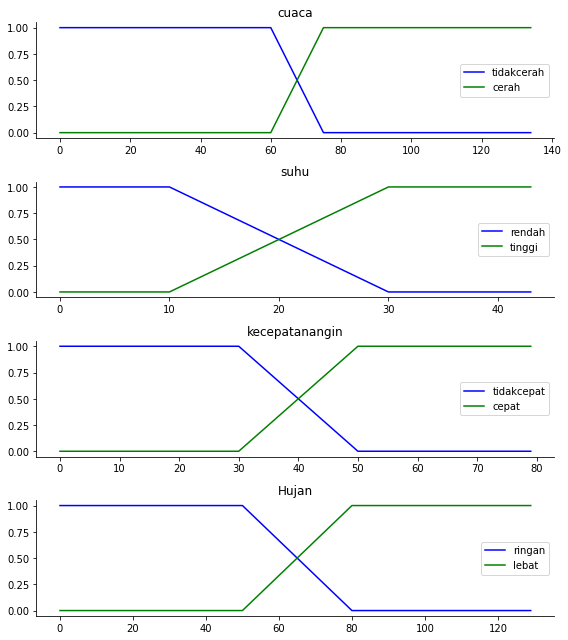

In [57]:
# membuat grafik himpunan fuzzy
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8,9))

ax0.plot(cuaca, cuaca_tc, 'b', linewidth=1.5, label='tidakcerah')
ax0.plot(cuaca, cuaca_cr, 'g', linewidth=1.5, label='cerah' )

ax0.set_title('cuaca')
ax0.legend()

ax1.plot(suhu, suhu_rd, 'b', linewidth=1.5, label='rendah')
ax1.plot(suhu, suhu_tg, 'g', linewidth=1.5, label='tinggi')

ax1.set_title('suhu')
ax1.legend()

ax2.plot(kecepatanangin, kecepatanangin_tc, 'b', linewidth=1.5, label='tidakcepat')
ax2.plot(kecepatanangin, kecepatanangin_cp, 'g', linewidth=1.5, label='cepat')

ax2.set_title('kecepatanangin')
ax2.legend()

ax3.plot(Hujan, Hujan_rg, 'b', linewidth=1.5, label='ringan')
ax3.plot(Hujan, Hujan_lb, 'g', linewidth=1.5, label='lebat')

ax3.set_title('Hujan')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [58]:
# menginput nilai kasus
cu = 100
sh = 34
kc = 50

In [59]:
# menentukan Rule Base
"""
[R1], jika suhu rendah, kecepatan angin pelan maka cuaca adalah cerah berawan
[R2], jika suhu rendah, kecepatan angin cepat maka cuaca adalah hujan lebat
[R3], jika suhu rendah, kecepatan angin tinggi maka cuaca adalah hujan sedang
[R4], jika suhu rendah, kecepatan angin sedang maka cuaca adalah hujan ringan
[R5], jika suhu tinggi, kecepatan angin rendah maka cuaca adalah cerah berawan
[R6], jika suhu tinggi, kecepatan angin sedang maka cuaca adalah cerah berawan
[R7], jika suhu sedang, kecepatan angin sedang maka cuaca adalah hujan ringan
[R8], jika suhu sedang, kecepatan angin sedang maka cuaca adalah hujan ringan
[R9], jika suhu sedang, kecepatan angin tinggi, maka cuaca adalah hujan sedang
[R10], jika suhu rendah, kecepatan angin tinggi maka cuaca adalah hujan lebat


Domain presentase cuaca:
CUACA TIDAKCERAH --> (100-Z)/(100-50) = fmin; apred[i] = fmin; (100 - Z) = 50 * apred[i]; Z = 100 - (50 * apred[i])
CUACA CERAH --> (Z-50)/(100-50) = fmin; apred[i] = fmin; (Z - 50) = 50 * apred[i]; Z = (50 * apred[i]) + 50

SUHU RENDAH --> (40-Z)/(40-34) = fmin; apred[i] = fmin; (40 - Z) = 6 * apred[i]; Z = 40 - (6 * apred[i])
SUHU TINGGI --> (Z-6)/(40-6) = fmin; apred[i] = fmin; (Z - 6) = 34 * apred[i]; Z = (34 * apred[i]) + 34

KECEPATAN ANGIN TIDAK CEPAT --> (50-Z)/(50-30 = fmin; apred[i] = fmin; (50 - Z) = 20 * apred[i]; Z = 50 - (20 * apred[i])
KECEPATAN ANGIN CEPAT --> (Z-20)/(50-20) = fmin; apred[i] = fmin; (Z - 20) = 20 * apred[i]; Z = (20 * apred[i]) + 20


""";


In [65]:
# menentukan derajat keanggotaan
a = []
a.append(fuzz.interp_membership(Cuaca, Cuaca_tc, cu))
a.append(fuzz.interp_membership(Cuaca, Cuaca_cr, cu))

b = []
b.append(fuzz.interp_membership(Suhu, Suhu_rd, sh))
b.append(fuzz.interp_membership(Suhu, Suhu_tg, sh))

c = []
c.append(fuzz.interp_membership(Kecepatanangin, Kecepatanangin_tc, kc))
c.append(fuzz.interp_membership(Kecepatanangin, Kecepatanangin_cp, kc))

print("Cuaca")
if a[0] > 0:
    print("Tidakcerah: "+str(a[0]))
if a[1] > 0:
    print("Cerah: "+str(a[1]))

print("Suhu")
if b[0] > 0:
    print("Rendah: "+str(b[0]))
if b[0] > 0:
    print("Tinggi: "+str(b[1]))

print("Kecepatanangin")
if c[0] > 0:
    print("Tidakcepat: "+str(c[0]))
if c[1] > 0:
    print("Cepat: "+str(c[1]))

Cuaca
Cerah: 1.0
Suhu
Kecepatanangin
Cepat: 1.0


---
Menentukan Rule Base dan Inferensi Tsukamoto
---

	[R1] jika suhu rendah, kecepatan angin tidak cepat dan cuaca tidak cerah maka hujan lebat
	[R2] jika suhu rendah, kecepatan angin tidak cepat dan cuaca cerah maka hujan ringan
	[R3] jika suhu rendah, kecepatan angin cepat dan cuaca tidak cerah maka hujan lebat
	[R4] jika suhu rendah, kecepatan angin cepat dan cuaca cerah maka hujan ringan
	[R5] jika suhu tinggi, kecepatan angin tidak cepat dan cuaca tidak cerah maka hujan ringan
	[R6] jika suhu tinggi, kecepatan angin tidak cepat dan cuaca cerah maka hujan ringan
	[R7] jika suhu tinggi, kecepatan angin cepat dan cuaca tidak cerah maka hujan lebat
	[R8] jika suhu tinggi, kecepatan angin cepat dan cuaca cerah maka hujan ringan

Domain Hujan: RINGAN --> (80-Z)/(80-50) = fmin; apred[i] = fmin; (80 - Z) = 30 apred[i]; Z = 80 - (30 apred[i]) LEBAT --> (Z-50)/(80-50) = fmin; apred[i] = fmin; (Z - 50) = 30 apred[i]; Z = (30 apred[i]) + 50


In [66]:
# Memodelkan Rule Base dan Inferensi Tsukamoto

x1 = np.fmin(a[0], b[0])
apred1 = np.fmin(x1, c[0])
print("Lebat, Nilai apred1 = ", apred1)
z1 = 80 - (30 * apred1)
print("Nilai z1 = ", z1)

x2 = np.fmin(a[0], b[0])
apred2 = np.fmin(x2, c[1])
print("Ringan, Nilai apred2 = ", apred2)
z2 = 80 - (30 * apred2)
print("Nilai z2 = ", z2)

x3 = np.fmin(a[0], b[1])
apred3 = np.fmin(x3, c[0])
print("Lebat, Nilai apred3 = ", apred3)
z3 = 80 - (30 * apred3)
print("Nilai z3 = ", z3)

x4 = np.fmin(a[0], b[1])
apred4 = np.fmin(x4, c[1])
print("Ringan, Nilai apred4 = ", apred4)
z4 = (30 * apred4) + 50
print("Nilai z4 = ", z4)

x5 = np.fmin(a[1], b[0])
apred5 = np.fmin(x5, c[0])
print("Ringan, Nilai apred5 = ", apred5)
z5 = 80 - (30 * apred5)
print("Nilai z5 = ", z5)

x6 = np.fmin(a[1], b[0])
apred6 = np.fmin(x6, c[1])
print("Ringan, Nilai apred6 = ", apred6)
z6 = (30 * apred6) + 50
print("Nilai z6 = ", z6)

x7 = np.fmin(a[1], b[1])
apred7 = np.fmin(x7, c[0])
print("Lebat, Nilai apred7 = ", apred7)
z7 = (30 * apred7) + 50
print("Nilai z7 = ", z7)

x8 = np.fmin(a[1], b[1])
apred8 = np.fmin(x8, c[1])
print("Ringan, Nilai apred8 = ", apred8)
z8 = (30 * apred8) + 50
print("Nilai z8 = ", z8)

Lebat, Nilai apred1 =  0.0
Nilai z1 =  80.0
Ringan, Nilai apred2 =  0.0
Nilai z2 =  80.0
Lebat, Nilai apred3 =  0.0
Nilai z3 =  80.0
Ringan, Nilai apred4 =  0.0
Nilai z4 =  50.0
Ringan, Nilai apred5 =  0.0
Nilai z5 =  80.0
Ringan, Nilai apred6 =  0.0
Nilai z6 =  50.0
Lebat, Nilai apred7 =  0.0
Nilai z7 =  50.0
Ringan, Nilai apred8 =  1.0
Nilai z8 =  80.0
